In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [13]:
train_data = pd.read_csv('processed_stroke_data_train.csv')
X_train = train_data.drop(columns=['stroke'])
y_train = train_data['stroke']

test_data = pd.read_csv('processed_stroke_data_test.csv')
X_test = test_data.drop(columns=['stroke'])
y_test = test_data['stroke']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<font color="bluegrey" size=+1.0><b>Multi-Layer Perceptron (MLP)</b></font>

In [14]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test))

y_pred_prob_mlp = model.predict(X_test_scaled)
y_pred_mlp = (y_pred_prob_mlp > 0.5).astype(int)

print("MLP Performance:")
print(classification_report(y_test, y_pred_mlp))
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_mlp)}")

c:\Users\zen\Documents\-- four\s2\FYP I\XAl-on-healthcare-diagnostics\xai\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7501 - loss: 0.5493 - val_accuracy: 0.9393 - val_loss: 0.2392
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9463 - loss: 0.2029 - val_accuracy: 0.9393 - val_loss: 0.1928
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9452 - loss: 0.1981 - val_accuracy: 0.9393 - val_loss: 0.2008
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9489 - loss: 0.1818 - val_accuracy: 0.9403 - val_loss: 0.2017
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9496 - loss: 0.1672 - val_accuracy: 0.9393 - val_loss: 0.2023
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9505 - loss: 0.1648 - val_accuracy: 0.9393 - val_loss: 0.1960
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9513 - loss: 0.1630 - val_accuracy: 0.9393 - val_loss: 0.1932
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9492 - loss: 0.1640 - val_accuracy: 0.

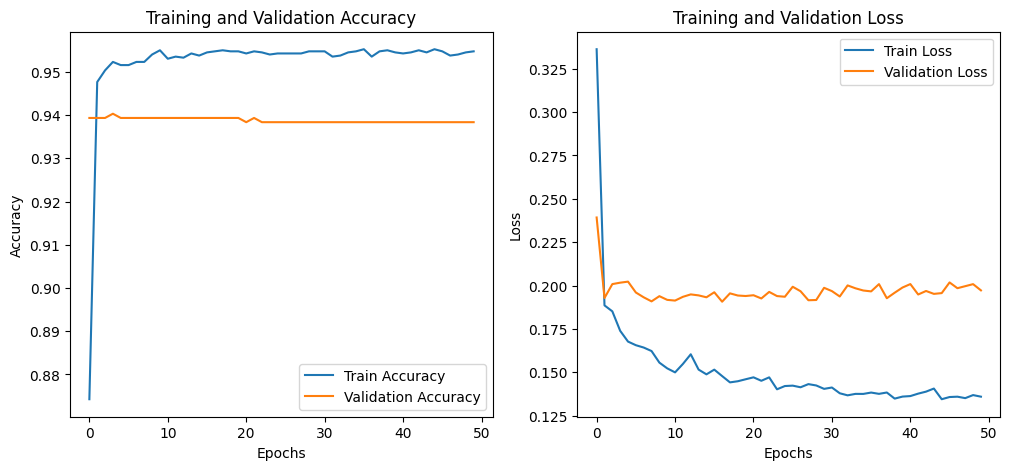

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

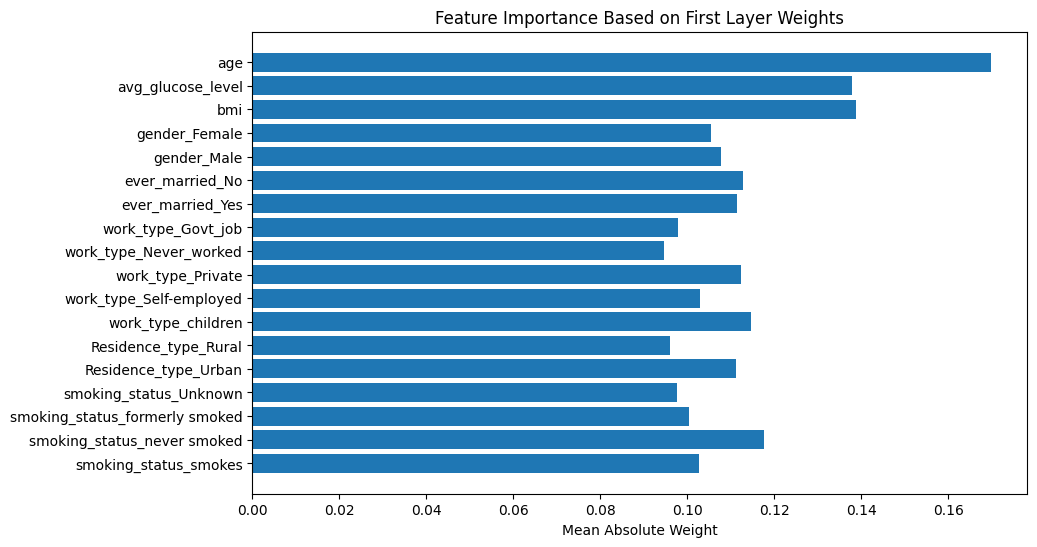

In [16]:
first_layer_weights = model.layers[0].get_weights()[0]  # Shape: (number of features, number of neurons)
feature_importance = np.mean(np.abs(first_layer_weights), axis=1)

feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Mean Absolute Weight")
plt.title("Feature Importance Based on First Layer Weights")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()

<font color="bluegrey" size=+1.0><b>Save results</b></font>

In [17]:
results = {
    "Model": ["Multi-layer Perceptron"],
    "Accuracy": [accuracy_score(y_test, y_pred_mlp)],
    "ROC AUC": [roc_auc_score(y_test, y_pred_prob_mlp)]
}

results_df = pd.DataFrame(results)
print(results_df)

                    Model  Accuracy   ROC AUC
0  Multi-layer Perceptron  0.938356  0.823958


<font color="bluegrey" size=+1.0><b>Save models</b></font>

In [18]:
from joblib import dump

model.save('mlp_model.h5')
print("Successfully saved the model.")

Successfully saved the model.
